In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 탐색적 데이터 분석 (EDA)

## 1. 데이터 로드 및 기본 정보 확인

In [2]:
import pandas as pd

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/2024_Project/ECG_Data_process/'

### json 파일 기본 통계

In [8]:
import json

with open(path+'testjson.json', 'r') as f:
    data = json.load(f)

# waveform 데이터에서 각 lead type의 데이터 리스트 길이 계산
lead_lengths = {lead: len(values) for lead, values in data['waveform']['data'].items()}
lead_lengths


{'I': 5500,
 'II': 5500,
 'III': 5500,
 'aVR': 5500,
 'aVL': 5500,
 'aVF': 5500,
 'V1': 5500,
 'V2': 5500,
 'V3': 5500,
 'V4': 5500,
 'V5': 5500,
 'V6': 5500}

### 데이터 타입 및 결측치를 파악  
- Age 결측값은 59, Gender 결측값은 -1,1 중 랜덤으로 들어간 상태임   
  (아래 분석에선 결측값이 존재하지 않음, 기존에 약 230개 정도의 결측값이 존재했음)
- lead_data: (12,5000) 형식
- lead_data_mean: lead_data 전체의 평균 값
- lead_data_std: lead_data 전체의 표준 편차 값

In [4]:
df = pd.read_csv(path+'eda_df.csv') # fold 0~4

In [5]:
# 데이터의 기본 정보 확인
print("데이터 기본 정보:\n")
display(df.info())
print("\n데이터의 첫 5행:\n")
display(df.head())

# 'labels' 열에서 '.'을 ','로 변환하여 리스트 형태로 변경
# 'labels' 열이 있는 경우 '.'을 ','로 변경
if 'labels' in df.columns:
    df['labels'] = df['labels'].apply(lambda x: str(x).replace('.', ','))
    print("\n'labels' 열에서 '.'을 ','로 변환 완료:\n")
    print(df['labels'].head())
else:
    print("\n'labels' 열이 데이터에 존재하지 않음.\n")


데이터 기본 정보:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68567 entries, 0 to 68566
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lead_data_mean  68567 non-null  float64
 1   lead_data_std   68567 non-null  float64
 2   labels          68567 non-null  object 
 3   age             68567 non-null  int64  
 4   gender          68567 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.6+ MB


None


데이터의 첫 5행:



,lead_data_mean,lead_data_std,labels,age,gender
0,-0.003202,0.169109,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,78,-1
1,-0.006087,0.124224,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,67,-1
2,0.000818,0.196499,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. ...,50,-1
3,-0.013724,1.792903,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. ...,36,-1
4,0.003632,0.192505,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,69,1



'labels' 열에서 '.'을 ','로 변환 완료:

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, dtype: object


In [6]:
# label 변환 이어서
"""
df['labels'][0] -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n 0, 1,] 이 상태임 변환 필요
"""
import ast

# ast.literal_eval(x): x가 문자열 형태의 리스트일 경우, 실제 리스트로 변환
# isinstance(x, str): 'labels' 열의 값이 문자열인지 확인하고, 문자열일 때만 변환
df['labels'] = df['labels'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
display(df['labels'].head(), type(df['labels'][0]))
display(len(df['labels'][0]),df['labels'][0])

,labels
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


list

26

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

### 기초 통계량 확인  
- 데이터 수 (fold 0~4): 68,567
- 고유 값 개수  
  - labels: 1322
    - 가장 많은 레이블 빈도: 14,738
  - age: 98 (연령대가 다양함)
  - gender: 2 (-1: 여성, 1: 남성)
- 평균 및 표준 편차
  - lead_data_mean의 평균: 0.0003
  - lead_data_std의 평균: 0.2237 (변동성이 큼)
  - age: 평균 - 59 (중년층 이상의 데이터가 많음) / 표준편차 - 18.37 (연령대의 분포가 다양함)
  - gender: 평균: 0.085 (약간 남성이 더 많음)
- 최소, 4분위, 최대
 - lead_data_mean: (-0.930306, 0.932041) - 0 을 중심으로 분포되어 잇음
 - lead_data_std: 최대 5.585798 - 표준편차가 큰 범위로 분포됨
 - age: 최소 0, 최대 97
 - gender: -1,1


In [7]:
# 기초 통계량 확인
display(df.describe(include='all'))

# 결측치 확인 => 없음
# display(df.isnull().sum())

# 각 열의 데이터 타입 및 고유 값 개수 확인
for col in df.columns:
    if df[col].dtype == 'object' and isinstance(df[col].iloc[0], list):  # 리스트 타입인지 확인
        # 리스트를 문자열로 변환한 후 고유 값 개수 계산
        unique_count = df[col].apply(lambda x: str(x)).nunique()
        print(f"{col}, 데이터 타입: 리스트, 고유 값 개수: {unique_count}")
    else:
        # 리스트가 아닌 경우 일반적인 방식으로 고유 값 개수 계산
        print(f"{col}, 데이터 타입: {df[col].dtype}, 고유 값 개수: {df[col].nunique()}")



,lead_data_mean,lead_data_std,labels,age,gender
count,68567.000000,68567.000000,68567,68567.000000,68567.000000
unique,NaN,NaN,1322,NaN,NaN
top,NaN,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",NaN,NaN
freq,NaN,NaN,14738,NaN,NaN
mean,0.000327,0.223723,NaN,59.014920,0.085974
std,0.014535,0.136839,NaN,18.374213,0.996305
min,-0.930036,0.000000,NaN,0.000000,-1.000000
25%,-0.001765,0.158622,NaN,49.000000,-1.000000
50%,0.000037,0.197332,NaN,62.000000,1.000000
75%,0.003011,0.250833,NaN,72.000000,1.000000


lead_data_mean, 데이터 타입: float64, 고유 값 개수: 67560
lead_data_std, 데이터 타입: float64, 고유 값 개수: 67888
labels, 데이터 타입: 리스트, 고유 값 개수: 1322
age, 데이터 타입: int64, 고유 값 개수: 98
gender, 데이터 타입: int64, 고유 값 개수: 2


In [18]:
# labels 컬럼의 최빈값 확인
most_frequent_label = df['labels'].mode()[0]
print("가장 빈번한 레이블 패턴:", most_frequent_label)

가장 빈번한 레이블 패턴: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 2. 단변량 분석 (각 변수 분포 및 시각화)

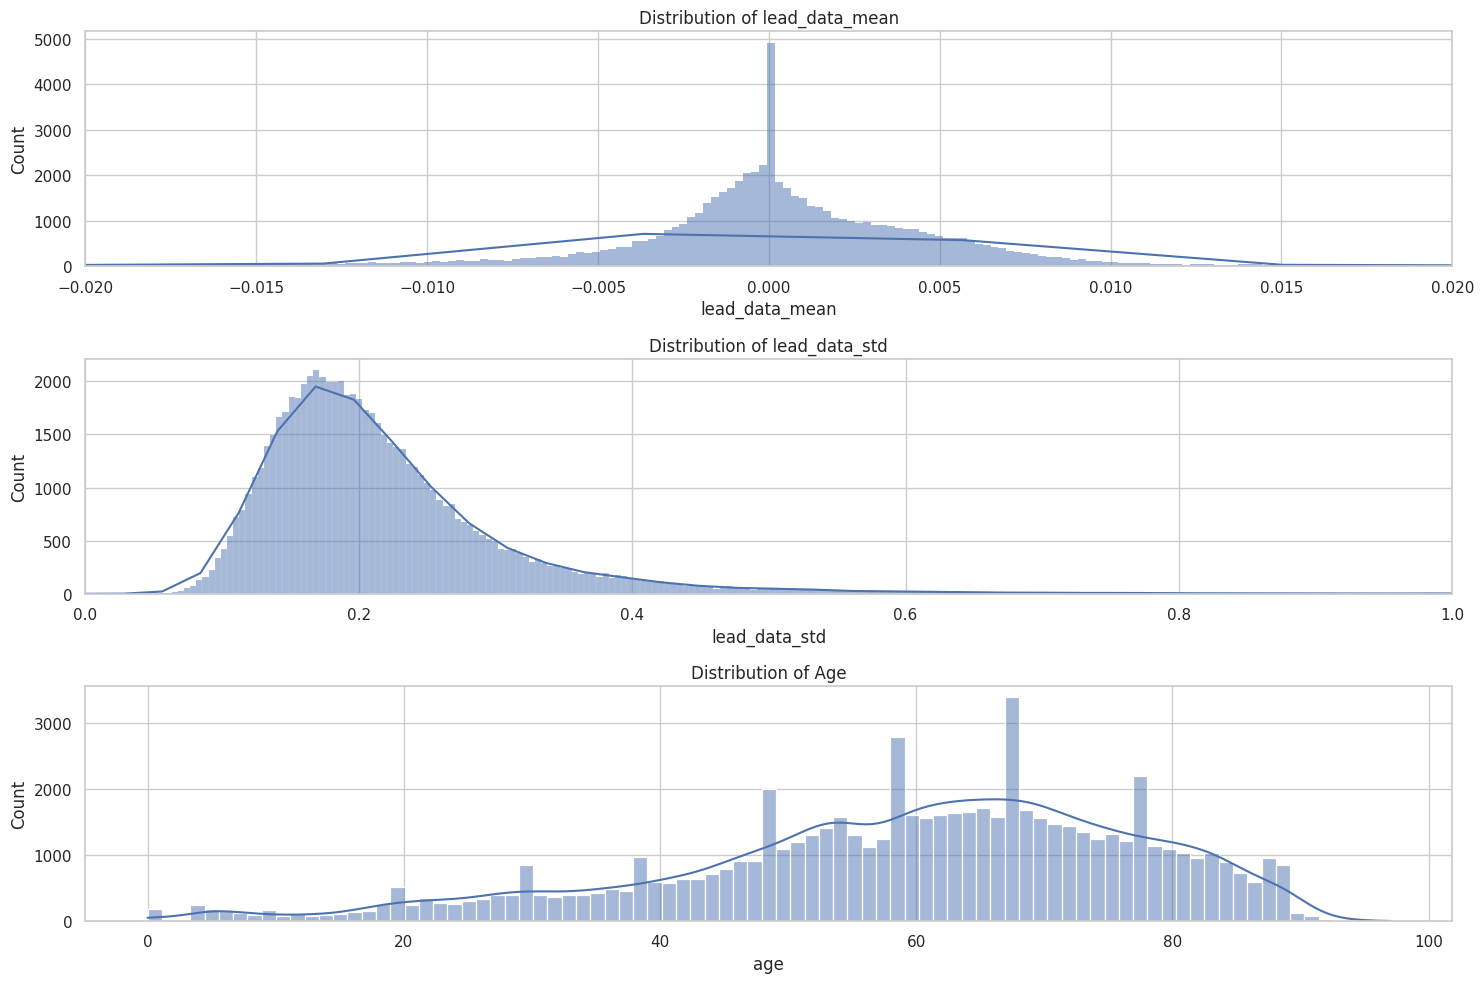

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))  # (너비 15, 높이 10)

# 'lead_data_mean' 열의 분포
plt.subplot(3, 1, 1)  # 3행 1열의 서브플롯 중 첫 번째 플롯
sns.histplot(df['lead_data_mean'], kde=True)
plt.title('Distribution of lead_data_mean')
plt.xlim(-0.02, 0.02)  # x축 범위를 -0.05에서 0.05로 제한

# 'lead_data_std' 열의 분포
plt.subplot(3, 1, 2)  # 3행 1열의 서브플롯 중 두 번째 플롯
sns.histplot(df['lead_data_std'], kde=True)
plt.title('Distribution of lead_data_std')
plt.xlim(0, 1)  # x축 범위를 0에서 1로 제한

# 'age' 열의 분포
plt.subplot(3, 1, 3)  # 3행 1열의 서브플롯 중 세 번째 플롯
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')

plt.tight_layout()

plt.show()

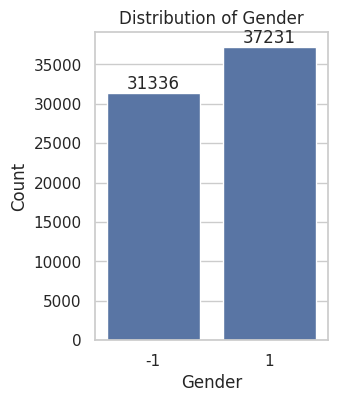

In [23]:
# gender 변수의 분포 시각화
plt.figure(figsize=(3, 4))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# 각 막대 위에 빈도 수를 표시
for patch in plt.gca().patches:
    count = int(patch.get_height())  # 막대의 높이(빈도 수)를 가져옴
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # x 위치: 막대의 중앙
        patch.get_height(),                     # y 위치: 막대의 높이 바로 위
        f'{count}',                             # 표시할 텍스트: 빈도 수
        ha='center',
        va='bottom'
    )

plt.show()

- labels 빈도 분포
 - label index 15, 20초 더 높은 빈도가 나타남

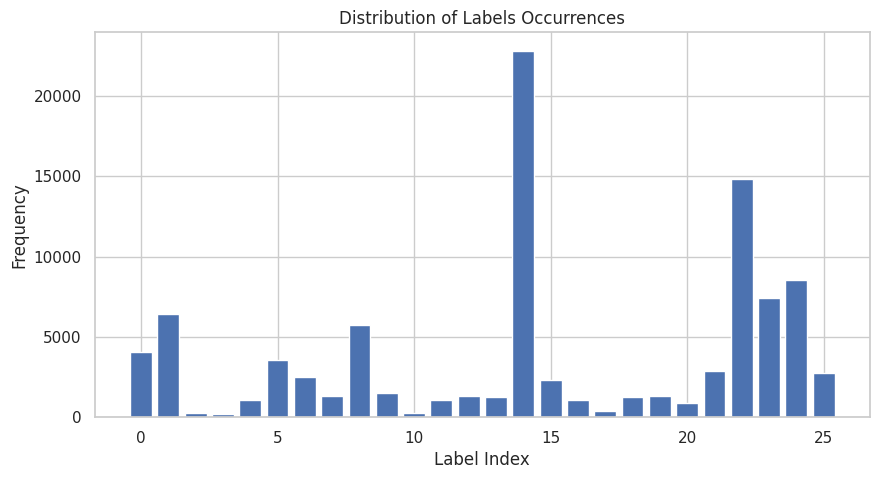

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 각 샘플의 'labels' 배열에서 각 고유 값의 빈도 계산
# 다중 레이블 데이터셋이므로, 각 레이블 위치가 활성 상태(예: 1)인 빈도를 모든 행에서 계산함

# 모든 'labels' 배열을 하나의 배열로 결합하고 발생 횟수 계산
all_labels = np.vstack(df['labels'].dropna().values)  # 모든 행을 하나의 배열로 결합
label_sums = np.sum(all_labels, axis=0)  # 모든 행에서 발생 빈도 합산

# 레이블 발생 빈도 분포를 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
plt.bar(range(len(label_sums)), label_sums)
plt.title('Distribution of Labels Occurrences')
plt.xlabel('Label Index')
plt.ylabel('Frequency')
plt.show()


- 개인당 평균 활성 레이블 수 약 1.42개
- 대부분의 데이터가 한두개의 레이블을 가지며, 멀티 레이블 이지만 동시에 여러개 가진 경우가 많지는 않음

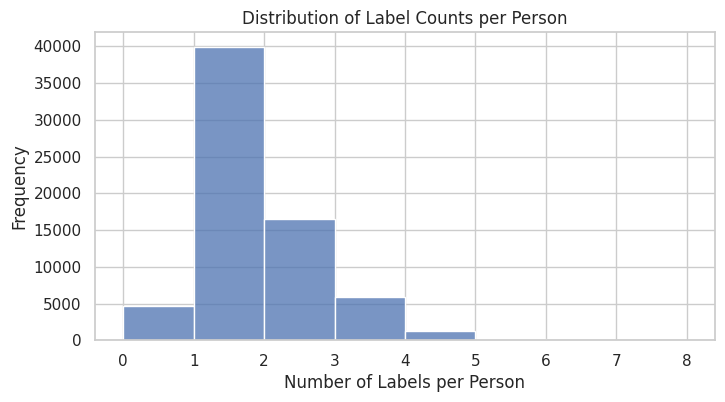

1.4152872373007424

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 각 개인의 'labels' 열에서 활성 레이블 개수를 계산
df['label_count'] = df['labels'].apply(lambda x: np.sum(x) if isinstance(x, list) else 0)

# 개인별 평균 활성 레이블 수 계산
average_labels_per_person = df['label_count'].mean()

# 개인별 레이블 개수 분포
if df['label_count'].max() > 0:  # label_count에 활성 레이블이 있는 경우에만
    plt.figure(figsize=(8, 4))
    sns.histplot(df['label_count'], bins=range(int(df['label_count'].max()) + 2), kde=False)
    plt.title('Distribution of Label Counts per Person')
    plt.xlabel('Number of Labels per Person')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No found")

average_labels_per_person


#### 상관관계 분석
- 전반적으로 변수들 간에 강한 상관관계가 없음

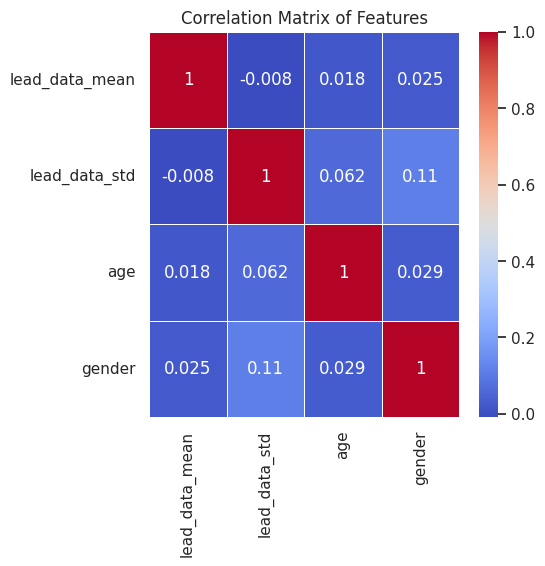

In [19]:
plt.figure(figsize=(5, 5))

correlation_matrix = df[['lead_data_mean', 'lead_data_std', 'age', 'gender']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

#### 이상치 탐지
- 연령이 극단적으로 낮거나 높은 경우들이 존재함을 알 수 있음

In [25]:
# 'lead_data_mean', 'lead_data_std', 'age' 열에서 이상치를 탐지
outliers = {}  # 각 열의 이상치 개수를 저장할 딕셔너리 생성
for column in ['lead_data_mean', 'lead_data_std', 'age']:
    Q1 = df[column].quantile(0.25)  # 첫 사분위수 (Q1)를 계산
    Q3 = df[column].quantile(0.75)  # 세 번째 사분위수 (Q3)를 계산
    IQR = Q3 - Q1  # IQR 계산 (Q3 - Q1)

    # IQR 범위를 벗어나는 이상치 개수를 계산
    outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]

    outliers[column] = outlier_count

# 이상치 개수를 확인
outliers

{'lead_data_mean': 7045, 'lead_data_std': 3821, 'age': 1509}

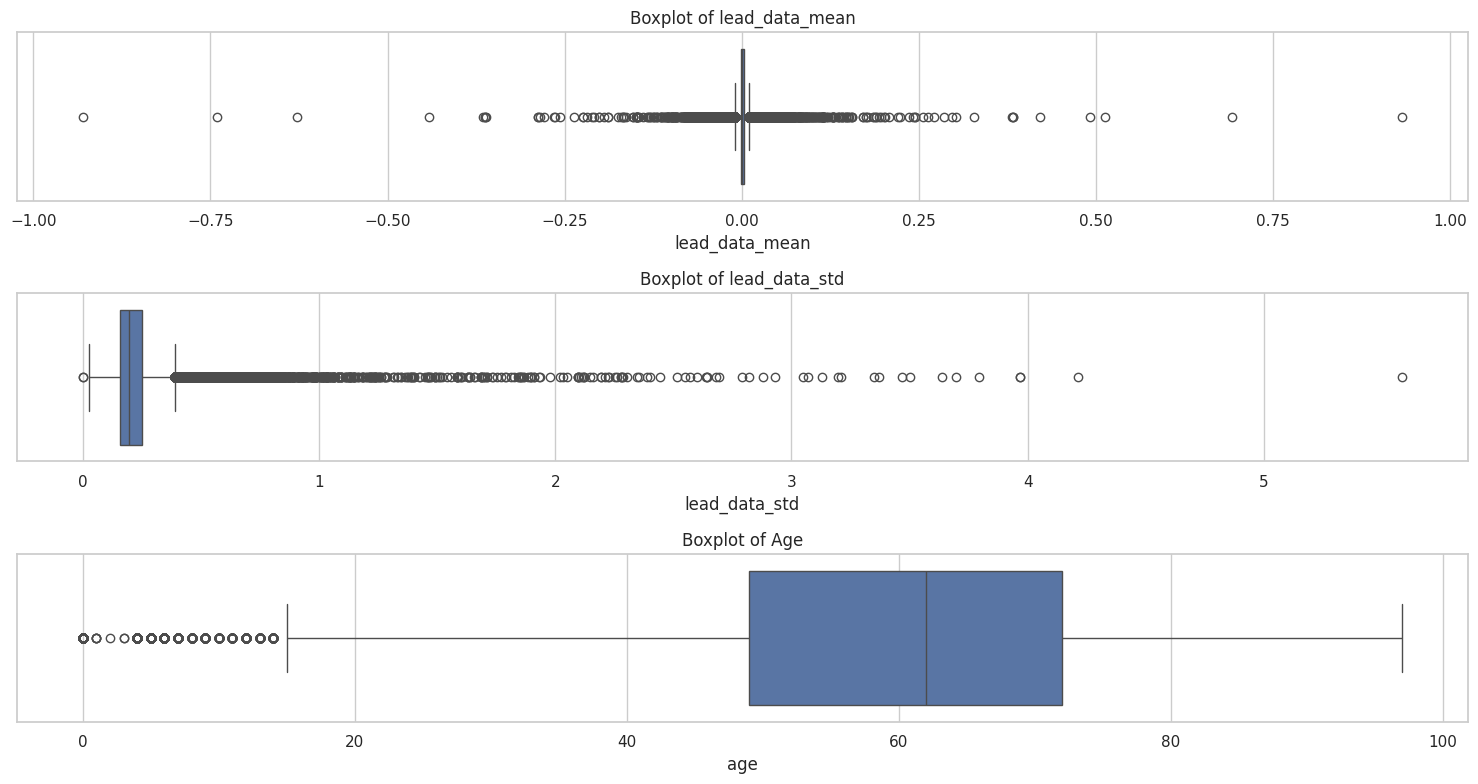

In [26]:
plt.figure(figsize=(15, 8))

# lead_data_mean
plt.subplot(3, 1, 1)
sns.boxplot(x=df['lead_data_mean'])
plt.title('Boxplot of lead_data_mean')

# lead_data_std
plt.subplot(3, 1, 2)
sns.boxplot(x=df['lead_data_std'])
plt.title('Boxplot of lead_data_std')

# age
plt.subplot(3, 1, 3)
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()


## 3. 다변량 분석

#### Gender, Age 간의 분포
- 특정 연령대에 성별이 집중되는지 확인
 - 대부분 40-80 에 집중되어 있음, 60대 초반에서 남성/여성 모두 빈도가 높은 분포를 보임
 - 40-70 남녀 모두 높은 빈도를 보이지만, 60대 중반 이후 남성이 여성보다 더 높은 빈도를 보임
 - 40-50초반 여성의 빈도가 남성 보다 조금 더 높음

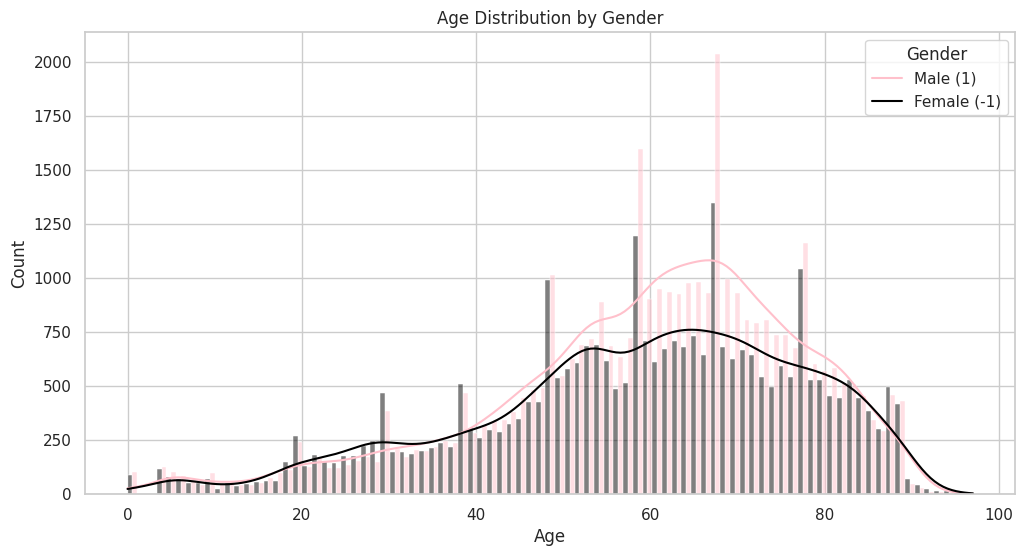

In [27]:
# gender에 따른 age 분포를 시각화
##  특정 연령대에 성별이 집중되는가?
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='gender', multiple='dodge', kde=True, palette={-1: 'black', 1: 'pink'})  # 옆으로 나란히 배치
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male (1)','Female (-1)'])
plt.show()

- 구간을 나눠서 다시 확인
 - 연령대별 성별 비율: 모든 연령대에서 남성이 높음
   (특히, 30-39, 40-49, 50-59 에서 더 높음)
 - 성별 비율 변화: 연령대가 증가함에 따라 여성의 비율이 조금 증가하는 경향이 있음
 - 70-79, 80세 이상에선 남녀 비율이 거의 비슷

<ipython-input-21-255190b31137>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(['age_group', 'gender']).size().unstack()  # 연령대별 성별 빈도수 계산


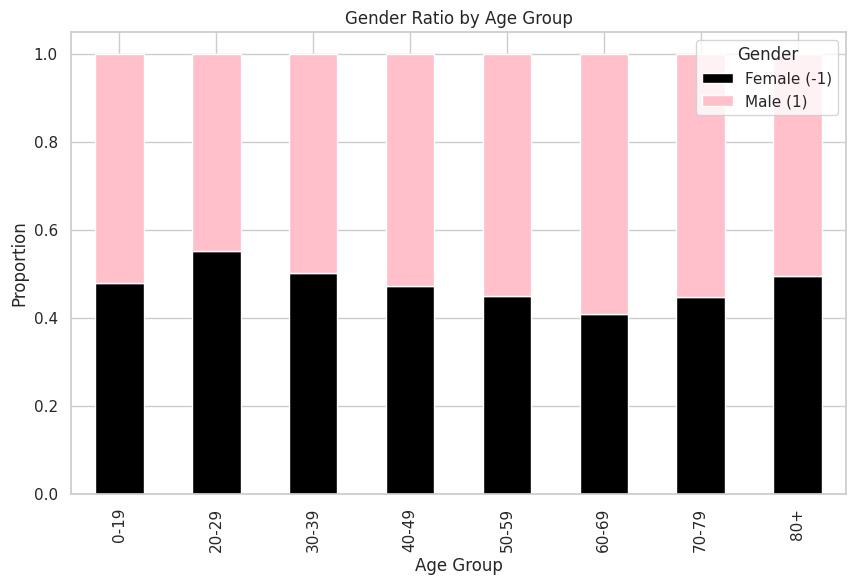

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]  # 연령대 구간 설정
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']  # 구간에 대한 레이블 설정
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)  # age 열을 연령대로 구분

# 연령대별 성별 비율 계산
age_gender_counts = df.groupby(['age_group', 'gender']).size().unstack()  # 연령대별 성별 빈도수 계산
age_gender_ratio = age_gender_counts.div(age_gender_counts.sum(axis=1), axis=0)  # 각 연령대별 비율 계산

# 성별 비율 시각화
age_gender_ratio.plot(kind='bar', stacked=True, color=['black', 'pink'], figsize=(10, 6))
plt.title('Gender Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Gender', labels=['Female (-1)', 'Male (1)'])
plt.show()


#### Age, Gender, Label 간의 분포

- 연령대 별 평균 레이블 활성화 개수
 - 연령이 높아질 수록 더 많은 레이블이 활성화 됨

<ipython-input-22-33e745d852a2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_label_activation = df.groupby('age_group')['label_count'].mean()  # 연령대별 평균 라벨 활성화 수 계산


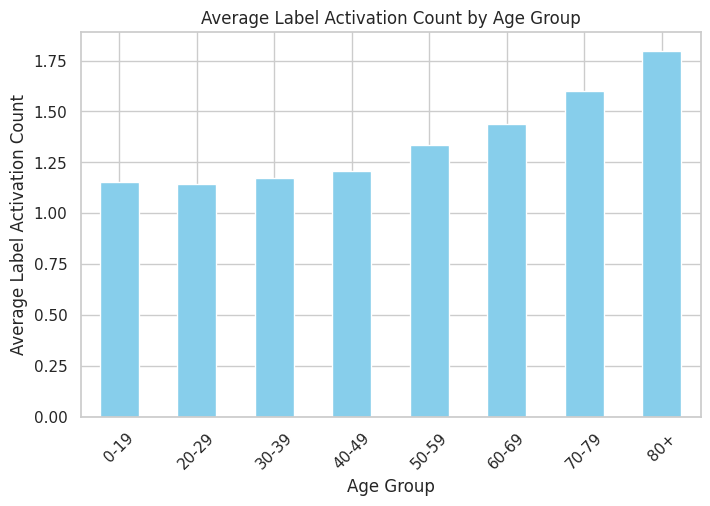

In [22]:
# 'age_group' 열로 각 연령대별 라벨 수의 평균을 계산함
df['label_count'] = df['labels'].apply(lambda x: sum(x) if isinstance(x, list) else 0)  # 라벨 활성화 수 계산
age_label_activation = df.groupby('age_group')['label_count'].mean()  # 연령대별 평균 라벨 활성화 수 계산

# 연령대별 평균 라벨 활성화 수
plt.figure(figsize=(8, 5))
age_label_activation.plot(kind='bar', color='skyblue')
plt.title('Average Label Activation Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Label Activation Count')
plt.xticks(rotation=45)
plt.show()

- 성별에 따른 레이블 평균값
 - 차이가 별로 없음

<ipython-input-23-d5663d618f46>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='labels_mean', data=df, ci=None)


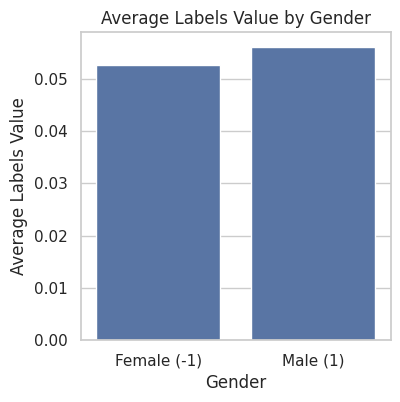

In [23]:
import numpy as np
df['labels_mean'] = df['labels'].apply(lambda x: np.mean(x) if isinstance(x, list) else None)

# 성별에 따른 'labels'의 평균값
plt.figure(figsize=(4, 4))
sns.barplot(x='gender', y='labels_mean', data=df, ci=None)
plt.title('Average Labels Value by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Labels Value')
plt.xticks(ticks=[0, 1], labels=['Female (-1)', 'Male (1)'])
plt.show()

- 나이에 따른 레이블 수 평균

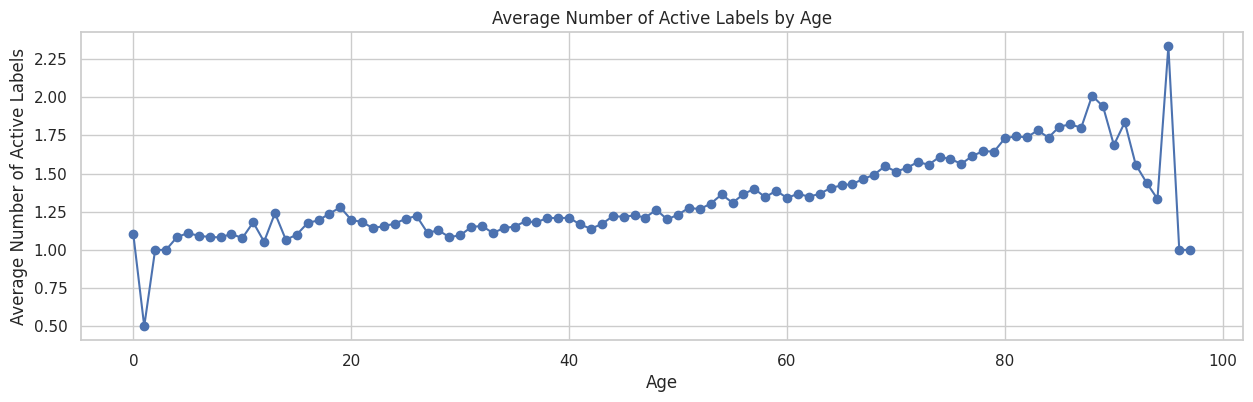

In [24]:
# 나이별로 그룹화, 각 나이에 대한 label count의 평균 계산
age_label_counts = df.groupby('age')['label_count'].mean()

plt.figure(figsize=(15, 4))
plt.plot(age_label_counts.index, age_label_counts.values, marker='o')
plt.title('Average Number of Active Labels by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Active Labels')
plt.grid(True)
plt.show()


#### 상관관계 시각화

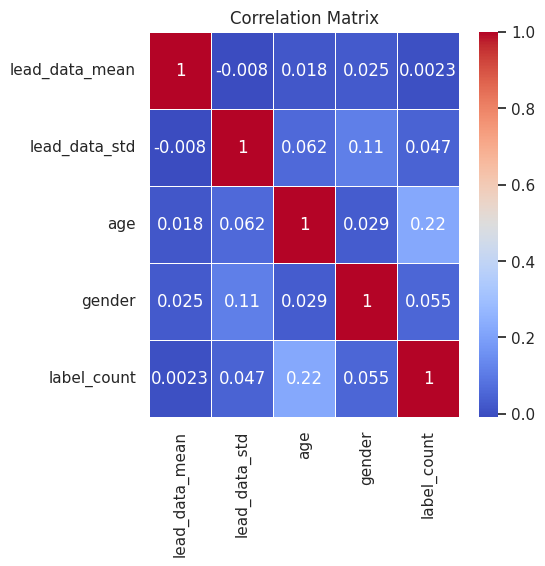

In [18]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # 숫자형 열만 선택
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


#### 클러스터링
- 0: 평균 연령 53.5세 중년층  
 - label_count 1.3, 활성화 된 레이블 수가 상대적으로 적음
 - label_mean: 0.049, 상대적으로 낮음
- 1: 평균 연령 74세, 고령층
 - label_count 1.6, 활성화 된 레이블 수가 상대적으로 많음
 - label_mean: 0.061, 상대적으로 높음
- 2: 평균 연령 25.8세, 청년층
 - label_count 1.15, 활성화 된 레이블 수가 가장 낮음
 - label_mean: 0.044, 가장 낮음

In [25]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# K-Means 군집화
clustering_features = df[['lead_data_mean', 'lead_data_std', 'age', 'label_count', 'labels_mean']].dropna()

# K-Means 클러스터링 수행 (클러스터 수 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_features['Cluster'] = kmeans.fit_predict(clustering_features)

# 각 클러스터의 평균값을 계산하여 특성 차이를 파악
cluster_summary = clustering_features.groupby('Cluster').mean()
cluster_summary
# 나이가 많은 Cluster 1은 활성 레이블 수가 높은 반면, 젊은 Cluster 2는 활성 레이블 수가 낮음. 이는 연령에 따라 활성 레이블 수가 차이나는 경향을 보여줌.

,lead_data_mean,lead_data_std,age,label_count,labels_mean
Cluster,,,,,
0,0.000200,0.211494,53.514687,1.299511,0.049981
1,0.000578,0.234842,74.406348,1.598947,0.061498
2,-0.000113,0.222131,25.777157,1.154852,0.044417


#### 교차 분석

- 연령과 성별에 따른 레이블 수(label_count)와 평균 레이블 값(labels_mean) 비교

In [26]:
# 나이와 성별을 교차하여 각 그룹별로 label_count와 labels_mean의 평균 계산
cross_analysis = df.groupby(['age', 'gender'])[['label_count', 'labels_mean']].mean()
cross_analysis


label_count  labels_mean
age gender                          
0   -1         1.104651     0.042487
     1         1.098039     0.042232
1   -1         0.500000     0.019231
2    1         1.000000     0.038462
3   -1         1.000000     0.038462
...                 ...          ...
95   1         1.500000     0.057692
96  -1         1.000000     0.038462
     1         1.000000     0.038462
97  -1         1.000000     0.038462
     1         1.000000     0.038462

[193 rows x 2 columns]